In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']

In [ ]:
#Creating train and validation datasets
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

train_samples = np.zeros((2*len(train_ind),224,224,3), dtype = 'float32')
train_labels = np.zeros((2*len(train_ind),224,224,1), dtype = 'float32')
val_samples = np.zeros((2*len(val_ind),224,224,3), dtype = 'float32')
val_labels = np.zeros((2*len(val_ind),224,224,1), dtype = 'float32')
man_samples = np.zeros((2*len(manual_ind),224,224,3), dtype = 'float32')
man_labels = np.zeros((2*len(manual_ind),224,224,1), dtype = 'float32')
a = 0

for i in train_ind:
  train_a_16 = np.load("gdrive/MyDrive/GEE_2016_np/"+i+".npy")
  train_a_19 = np.load("gdrive/MyDrive/GEE_2019_np/"+i+".npy")
  train_b_16 = np.load("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np_label/"+i+".npy")
  train_b_19 = np.load("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np_label/"+i+".npy")


  new_train_b_16 = np.expand_dims(train_b_16[:,:,0], axis=2)
  new_train_b_19 = np.expand_dims(train_b_19[:,:,0], axis=2)

  train_a_16 = cv2.resize(train_a_16, (224,224))
  train_a_19 = cv2.resize(train_a_19, (224,224))
  new_train_b_16 = cv2.resize(new_train_b_16, (224,224))
  new_train_b_19 = cv2.resize(new_train_b_19, (224,224))

  train_samples[a,:,:,:] = train_a_16
  train_labels[a,:,:,:] = np.expand_dims(new_train_b_16, 2)

  a = a+1
  train_samples[a,:,:,:] = train_a_19
  train_labels[a,:,:,:] = np.expand_dims(new_train_b_19, 2)
  a = a+1
  print(i)

a = 0
for i in val_ind:
  train_a_16 = np.load("gdrive/MyDrive/GEE_2016_np/"+i+".npy")
  train_a_19 = np.load("gdrive/MyDrive/GEE_2019_np/"+i+".npy")
  train_b_16 = np.load("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np_label/"+i+".npy")
  train_b_19 = np.load("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np_label/"+i+".npy")


  new_train_b_16 = np.expand_dims(train_b_16[:,:,0], axis=2)
  new_train_b_19 = np.expand_dims(train_b_19[:,:,0], axis=2)

  train_a_16 = cv2.resize(train_a_16, (224,224))
  train_a_19 = cv2.resize(train_a_19, (224,224))
  new_train_b_16 = cv2.resize(new_train_b_16, (224,224))
  new_train_b_19 = cv2.resize(new_train_b_19, (224,224))

  val_samples[a,:,:,:] = train_a_16
  val_labels[a,:,:,:] = np.expand_dims(new_train_b_16, 2)

  a = a+1
  val_samples[a,:,:,:] = train_a_19
  val_labels[a,:,:,:] = np.expand_dims(new_train_b_19, 2)
  a = a+1
  print(i)

a = 0
for i in manual_ind:
  train_a_16 = np.load("gdrive/MyDrive/GEE_2016_np/"+i+".npy")
  train_a_19 = np.load("gdrive/MyDrive/GEE_2019_np/"+i+".npy")
  train_b_16 = np.load("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np_label/"+i+".npy")
  train_b_19 = np.load("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np_label/"+i+".npy")


  new_train_b_16 = np.expand_dims(train_b_16[:,:,0], axis=2)
  new_train_b_19 = np.expand_dims(train_b_19[:,:,0], axis=2)

  train_a_16 = cv2.resize(train_a_16, (224,224))
  train_a_19 = cv2.resize(train_a_19, (224,224))
  new_train_b_16 = cv2.resize(new_train_b_16, (224,224))
  new_train_b_19 = cv2.resize(new_train_b_19, (224,224))

  man_samples[a,:,:,:] = train_a_16
  man_labels[a,:,:,:] = np.expand_dims(new_train_b_16, 2)

  a = a+1
  man_samples[a,:,:,:] = train_a_19
  man_labels[a,:,:,:] = np.expand_dims(new_train_b_19, 2)
  a = a+1
  print(i)

In [ ]:
np.save("gdrive/MyDrive/UNET/train_images/"+"new_train_images_300_224.npy", train_samples.astype('int16'))
np.save("gdrive/MyDrive/UNET/train_masks/"+"new_train_masks_300_224.npy", train_labels.astype('int16'))
np.save("gdrive/MyDrive/UNET/val_images/"+"new_val_300_224.npy", val_samples.astype('int16'))
np.save("gdrive/MyDrive/UNET/val_masks/"+"new_val_300_224.npy", val_labels.astype('int16'))

In [ ]:
import numpy as np
train_samples = np.load("gdrive/MyDrive/UNET/train_images/"+"train_images_300_224.npy")
train_labels = np.load("gdrive/MyDrive/UNET/train_masks/"+"train_masks_300_224.npy")
val_samples = np.load("gdrive/MyDrive/UNET/val_images/"+"val_300_224.npy")
val_labels = np.load("gdrive/MyDrive/UNET/val_masks/"+"val_300_224.npy")

In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_samples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((val_samples, val_labels))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 32

class Augment(tf.keras.layers.Layer):
  def __init__(self, seed=42):
    super().__init__()
    # both use the same seed, so they'll make the same random changes.
    self.augment_inputs = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)
    self.augment_labels = tf.keras.layers.RandomFlip(mode="horizontal", seed=seed)

  def call(self, inputs, labels):
    inputs = self.augment_inputs(inputs)
    labels = self.augment_labels(labels)
    return inputs, labels

train_ds = train_dataset.cache().shuffle(100).repeat().map(Augment()).prefetch(buffer_size=AUTOTUNE).batch(BATCH_SIZE)
val_ds = test_dataset.cache().repeat().map(Augment()).prefetch(buffer_size=AUTOTUNE).batch(BATCH_SIZE)

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

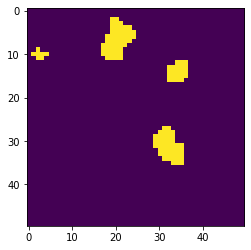

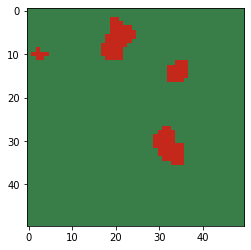

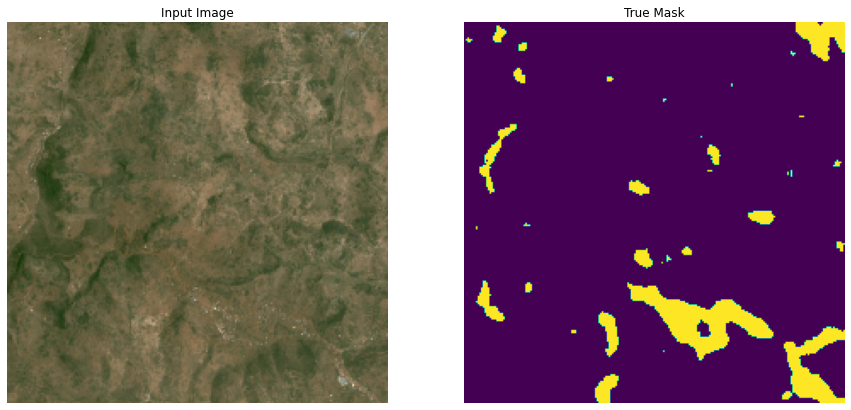

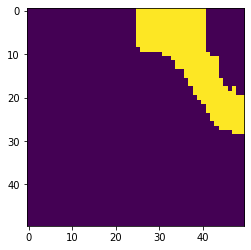

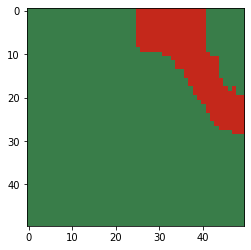

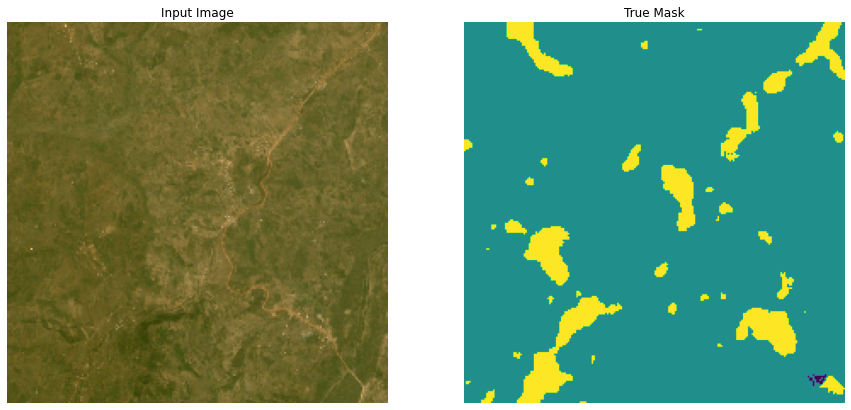

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

for images, masks in train_ds.take(2):
  sample_image, sample_mask = images[0], masks[0]
  new_mask = np.zeros((50,50,3), dtype = 'uint8')
  plt.imshow(tf.keras.utils.array_to_img(tf.slice(sample_mask, begin = [0,0,0], size = [50,50,1])))
  plt.show()
  for i in range(50):
    for j in range(50):
      if sample_mask[i][j] == 0:
        new_mask[i,j,:] = 65, 155, 223
      if sample_mask[i][j] == 1:
        new_mask[i,j,:] = 57, 125, 73
      if sample_mask[i][j] == 2:
        new_mask[i,j,:] = 196, 40, 27
  plt.imshow(new_mask)
  plt.show()
  display([sample_image, sample_mask])

In [ ]:
def load_image(input_image, input_mask):
  input_image = tf.image.resize(input_image, (224, 224))
  input_mask = tf.image.resize(input_mask, (224, 224))

  #input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask


new_train_ds = normalized_train_ds.map(load_image)
new_val_ds = normalized_val_ds.map(load_image)

In [ ]:
image_batch, labels_batch = next(iter(new_train_ds))
first_image = image_batch[0]
first_label = labels_batch[0]
print(first_image.shape)
first_label.shape

(224, 224, 3)


TensorShape([224, 224, 1])

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)

down_stack.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git
from tensorflow_examples.models.pix2pix import pix2pix
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels:int):
  inputs = tf.keras.layers.Input(shape=[224, 224, 3])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
OUTPUT_CLASSES = 3

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [ ]:
def add_sample_weights(image, label):
  # The weights for each class, with the constraint that:
  #     sum(class_weights) == 1.0
  class_weights = tf.constant([1.4, 0.7, 1.2])
  class_weights = class_weights/tf.reduce_sum(class_weights)

  # Create an image of `sample_weights` by using the label at each pixel as an 
  # index into the `class weights` .
  sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))

  return image, label, sample_weights

In [ ]:
'''class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))'''

EPOCHS = 10
steps_per_epoch = 400//BATCH_SIZE
val_steps_per_epoch = 102//BATCH_SIZE
#VAL_SUBSPLITS = 5
#VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(new_train_ds.map(add_sample_weights), 
                          epochs=EPOCHS, 
                          steps_per_epoch=steps_per_epoch,
                          validation_data=new_val_ds,
                          verbose=1,
                          validation_steps=val_steps_per_epoch)

Epoch 1/10
12/12 [==============================] - 121s 10s/step - loss: 0.2127 - accuracy: 0.7332 - val_loss: 0.6129 - val_accuracy: 0.7419
Epoch 2/10
12/12 [==============================] - 117s 10s/step - loss: 0.1637 - accuracy: 0.7983 - val_loss: 0.4919 - val_accuracy: 0.8154
Epoch 3/10
12/12 [==============================] - 116s 9s/step - loss: 0.1474 - accuracy: 0.8119 - val_loss: 0.4518 - val_accuracy: 0.8231
Epoch 4/10
12/12 [==============================] - 112s 9s/step - loss: 0.1409 - accuracy: 0.8179 - val_loss: 0.4128 - val_accuracy: 0.8426
Epoch 5/10
12/12 [==============================] - 115s 10s/step - loss: 0.1363 - accuracy: 0.8185 - val_loss: 0.4192 - val_accuracy: 0.8308
Epoch 6/10
12/12 [==============================] - 111s 9s/step - loss: 0.1292 - accuracy: 0.8180 - val_loss: 0.4019 - val_accuracy: 0.8411
Epoch 7/10
12/12 [==============================] - 111s 9s/step - loss: 0.1195 - accuracy: 0.8313 - val_loss: 0.4392 - val_accuracy: 0.8165
Epoch 8/10

In [ ]:
import matplotlib.pyplot as plt
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()
  
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

def show_predictions(dataset=new_train_ds, num=10):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

1/1 [==============================] - 6s 6s/step


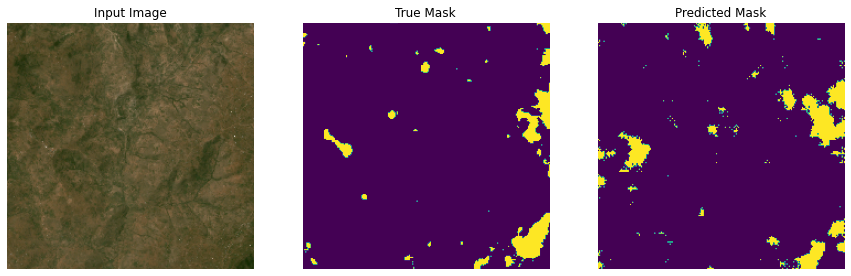

1/1 [==============================] - 4s 4s/step


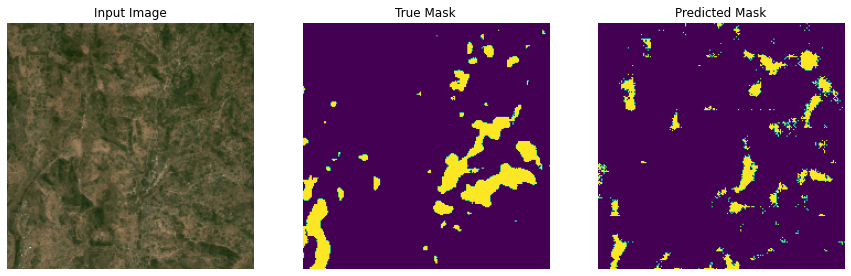

1/1 [==============================] - 4s 4s/step


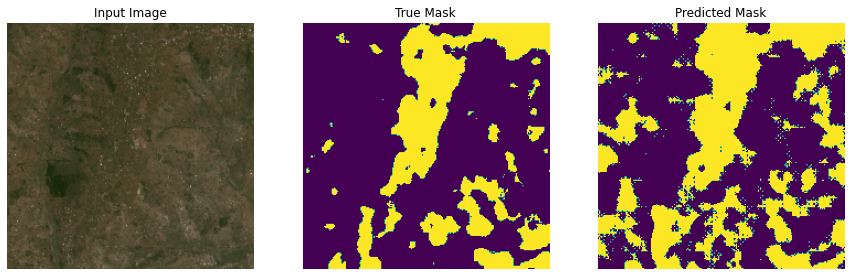

1/1 [==============================] - 4s 4s/step


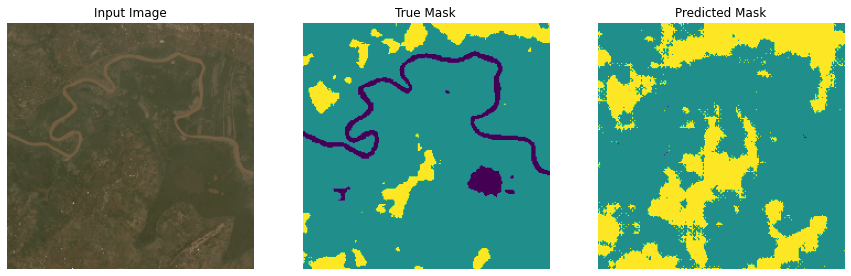

1/1 [==============================] - 4s 4s/step


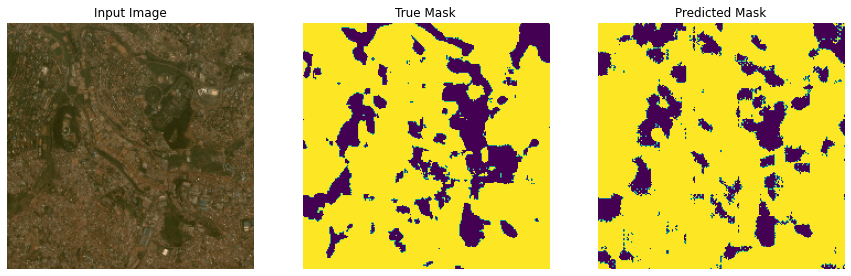

1/1 [==============================] - 4s 4s/step


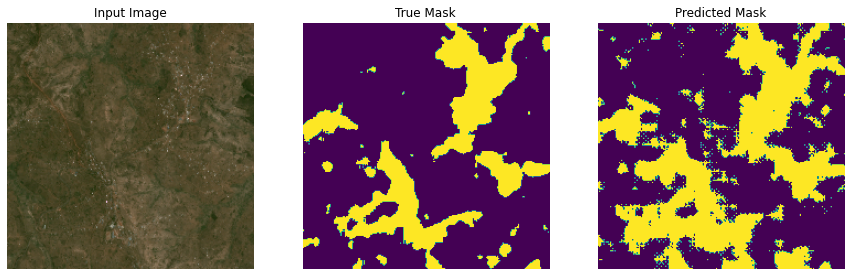

1/1 [==============================] - 4s 4s/step


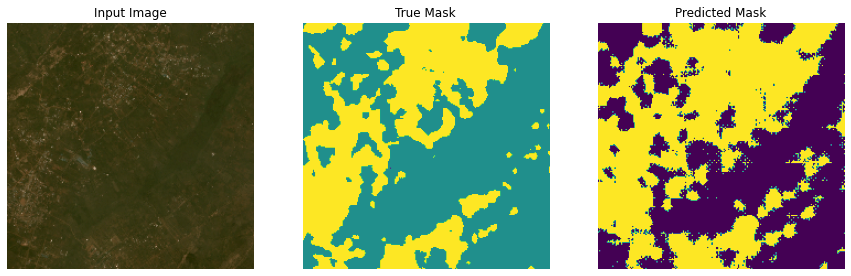

1/1 [==============================] - 4s 4s/step


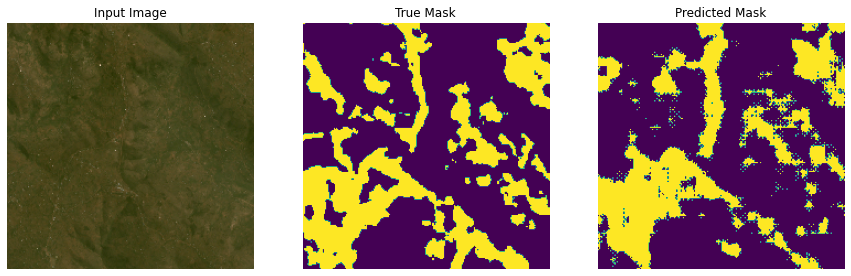

1/1 [==============================] - 4s 4s/step


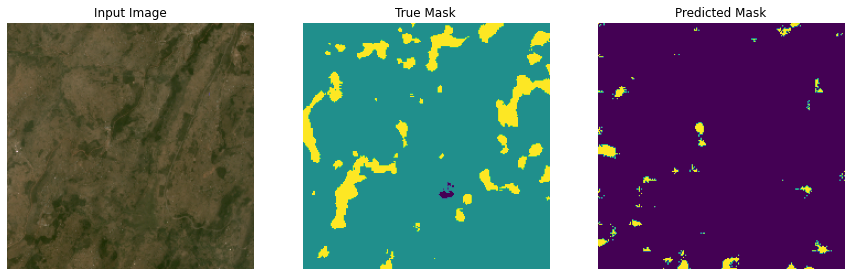

1/1 [==============================] - 4s 4s/step


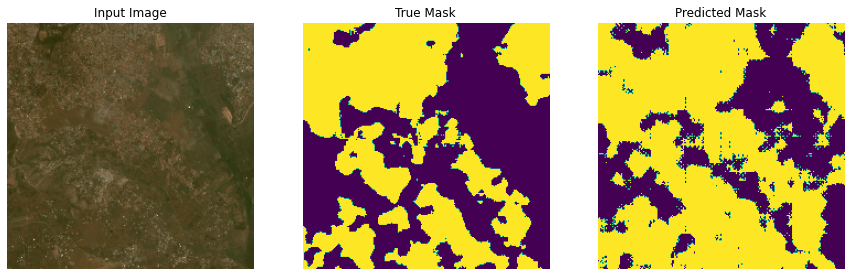

In [ ]:
show_predictions()

In [ ]:
model.save("gdrive/MyDrive/UNET/models/model_trial_300_224_crct_data")

In [ ]:
#model =  tf.keras.models.load_model('gdrive/MyDrive/UNET/models/model_trial_300_224')
from sklearn.metrics import classification_report
i = 0
precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []


accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}

for image, mask in new_val_ds.take(4):
  pred_mask = model.predict(image)
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  for j in range(32):
    mask_im = np.array(mask[j], dtype = 'uint8')
    pred_mask_im = np.array(pred_mask[j], dtype= 'uint8')

    uniq_gt = np.unique(mask_im)
    uniq_pr = np.unique(pred_mask_im)

    uniq_inter = np.union1d(uniq_gt, uniq_pr)
    uniq_inter = np.unique(uniq_inter)
    
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
    m.update_state(mask_im,pred_mask_im)
    iou_overall.append(m.result().numpy())

    for k in uniq_inter:
      m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
      m.update_state(mask_im,pred_mask_im)
      id_dict[k].append(m.result().numpy())

    mask_im = np.reshape(mask_im, 224*224)
    pred_mask_im = np.reshape(pred_mask_im, 224*224)
    report = classification_report(mask_im, pred_mask_im, output_dict=True)
    #print(report)
    try:
      precision_list_land.append(report['2']['precision'])
    except:
      pass
    try:
      precision_list_trees.append(report['1']['precision'])
    except:
      pass
    try:
      precision_list_water.append(report['0']['precision'])
    except:
      pass


    try:
      recall_list_land.append(report['2']['recall'])
    except:
      pass
    try:
      recall_list_trees.append(report['1']['recall'])
    except:
      pass
    try:
      recall_list_water.append(report['0']['recall'])
    except:
      pass
    
    accuracy_overall.append(report['accuracy'])

In [ ]:
from statistics import mean
print("Average Impervios Precision:", mean(precision_list_land)*100)
print("Average Impervios Recall:", mean(recall_list_land)*100)
print("Average Tree Canopy Precision:", mean(precision_list_trees)*100)
print("Average Tree Canopy Recall:", mean(recall_list_trees)*100)
print("Average Water Precision:", mean(precision_list_water)*100)
print("Average Water Recall:", mean(recall_list_water)*100)
print("Average Accuracy:", mean(accuracy_overall)*100)
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average Impervios Precision: 47.78400337189391
Average Impervios Recall: 67.23147933564665
Average Tree Canopy Precision: 90.20873997887766
Average Tree Canopy Recall: 83.21452475580867
Average Water Precision: 8.076923076923077
Average Water Recall: 0.019834555232002334
Average Accuracy: 81.69434216557717
Average IoU Trees: 76.49027109146118
Average IoU Land: 38.50919306278229
Average IoU Water: 0.019834110571537167
Average IoU Overall: 48.3578622341156


In [ ]:
iou_tree_loss = []
iou_tree_gain = []
iou_land_loss = []
iou_overall_loss = []
iou_land_gain = []
iou_water_loss = []
iou_water_gain = []
iou_overall_gain = []
iou_no_change = []

id_dict_loss = {0:iou_no_change, 1: iou_water_loss, 2: iou_tree_loss, 3: iou_land_loss}
id_dict_gain = {0:iou_no_change, 1: iou_water_gain, 2: iou_tree_gain, 3: iou_land_gain}

precision_list_land_loss = []
recall_list_land_loss = []

precision_list_trees_loss = []
recall_list_trees_loss = []

precision_list_water_loss = []
recall_list_water_loss = []

accuracy_overall_loss = []

precision_list_land_gain = []
recall_list_land_gain = []

precision_list_trees_gain = []
recall_list_trees_gain = []

precision_list_water_gain = []
recall_list_water_gain = []

accuracy_overall_gain = []


for i in val_ind:
  train_a_16 = np.load("gdrive/MyDrive/GEE_2016_np/"+i+".npy")
  train_a_19 = np.load("gdrive/MyDrive/GEE_2019_np/"+i+".npy")
  train_b_16 = np.load("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np_label/"+i+".npy")
  train_b_19 = np.load("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np_label/"+i+".npy")


  new_train_b_16 = np.expand_dims(train_b_16[:,:,0], axis=2)
  new_train_b_19 = np.expand_dims(train_b_19[:,:,0], axis=2)

  train_a_16 = cv2.resize(train_a_16, (224,224))
  train_a_19 = cv2.resize(train_a_19, (224,224))

  new_train_b_16 = cv2.resize(new_train_b_16, (224,224))
  new_train_b_19 = cv2.resize(new_train_b_19, (224,224))

  new_train_b_16 = new_train_b_16+1
  new_train_b_19 = new_train_b_19+1
  
  train_a_16 = train_a_16/255.0
  train_a_16 = np.expand_dims(train_a_16, axis = 0)
  train_a_16 = tf.convert_to_tensor(train_a_16)

  train_a_19 = train_a_19/255.0
  train_a_19 = np.expand_dims(train_a_19, axis = 0)
  train_a_19 = tf.convert_to_tensor(train_a_19)

  pred_mask_16 = model.predict(train_a_16)
  pred_mask_19 = model.predict(train_a_19)
  pred_mask_16 = tf.math.argmax(pred_mask_16, axis=-1)
  pred_mask_19 = tf.math.argmax(pred_mask_19, axis=-1)

  pred_mask_16 = pred_mask_16+1
  pred_mask_19 = pred_mask_19+1

  pred_mask_16 = np.array(pred_mask_16)
  pred_mask_19 = np.array(pred_mask_19)

  #print(pred_mask_16.shape)
  sub_true = new_train_b_19 + (-1)*new_train_b_16
  
  sub_true[np.where(np.abs(sub_true)>0)] = new_train_b_16.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = new_train_b_19.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()
  

  sub_pred = pred_mask_19 + (-1)*pred_mask_16
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = pred_mask_16.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = pred_mask_19.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  
  modified_image_2016_true = tf.convert_to_tensor(modified_image_2016_true)
  modified_image_2019_true = tf.convert_to_tensor(modified_image_2019_true)
  modified_image_2016_pred = tf.convert_to_tensor(modified_image_2016_pred)
  modified_image_2019_pred = tf.convert_to_tensor(modified_image_2019_pred)

  uniq_gt = np.unique(modified_image_2016_true)
  uniq_pr = np.unique(modified_image_2016_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))  
  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2016_true,modified_image_2016_pred)
  iou_overall_loss.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2016_true,modified_image_2016_pred)
    id_dict_loss[k].append(m.result().numpy())
  
  
  uniq_gt = np.unique(modified_image_2019_true)
  uniq_pr = np.unique(modified_image_2019_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))
  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2019_true,modified_image_2019_pred)
  iou_overall_gain.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2019_true,modified_image_2019_pred)
    id_dict_gain[k].append(m.result().numpy())
  
  modified_image_2016_true = np.reshape(modified_image_2016_true,224*224)
  modified_image_2019_true = np.reshape(modified_image_2019_true,224*224)
  modified_image_2016_pred = np.reshape(modified_image_2016_pred,224*224)
  modified_image_2019_pred = np.reshape(modified_image_2019_pred,224*224)

  
  report = classification_report(modified_image_2016_true, modified_image_2016_pred, output_dict=True)
  try:
    precision_list_land_loss.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_loss.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_loss.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_loss.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_loss.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_loss.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_loss.append(report['accuracy'])

  report = classification_report(modified_image_2019_true, modified_image_2019_pred, output_dict=True)
  try:
    precision_list_land_gain.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_gain.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_gain.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_gain.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_gain.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_gain.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_gain.append(report['accuracy'])

In [ ]:
from statistics import mean
print("Average IoU Land Loss:", mean(iou_land_loss)*100)
print("Average IoU Water Loss:", mean(iou_water_loss)*100)
print("Average IoU Tree Loss:", mean(iou_tree_loss)*100)
print("Average IoU Land Gain:", mean(iou_land_gain)*100)
print("Average IoU Water Gain:", mean(iou_water_gain)*100)
print("Average IoU Tree Gain:", mean(iou_tree_gain)*100)
print("Average IoU Overall loss:", mean(iou_overall_loss)*100)
print("Average IoU Overall gain:", mean(iou_overall_gain)*100)

Average IoU Land Loss: 1.4618783257901669
Average IoU Water Loss: 0.0
Average IoU Tree Loss: 14.169712364673615
Average IoU Land Gain: 14.202338457107544
Average IoU Water Gain: 0.0
Average IoU Tree Gain: 1.4794654212892056
Average IoU Overall loss: 6.726004183292389
Average IoU Overall gain: 6.89898207783699


In [ ]:
print("Average Precision Land loss:", mean(precision_list_land_loss)*100)
print("Average Precision Water loss:", mean(precision_list_water_loss)*100)
print("Average Precision Trees loss:", mean(precision_list_trees_loss)*100)
print("Average Recall Land loss:", mean(recall_list_land_loss)*100)
print("Average Recall Water loss:", mean(recall_list_water_loss)*100)
print("Average Recall Trees loss:", mean(recall_list_trees_loss)*100)
print("Average Accuracy Overall loss:", mean(accuracy_overall_loss)*100)

Average Precision Land loss: 1.803967006906032
Average Precision Water loss: 0.0
Average Precision Trees loss: 25.518176739024433
Average Recall Land loss: 15.980343669134081
Average Recall Water loss: 0.0
Average Recall Trees loss: 26.984693878873006
Average Accuracy Overall loss: 77.39494235194077


In [ ]:
print("Average Precision Land gain:", mean(precision_list_land_gain)*100)
print("Average Precision Water gain:", mean(precision_list_water_gain)*100)
print("Average Precision Trees gain:", mean(precision_list_trees_gain)*100)
print("Average Recall Land gain:", mean(recall_list_land_gain)*100)
print("Average Recall Water gain:", mean(recall_list_water_gain)*100)
print("Average Recall Trees gain:", mean(recall_list_trees_gain)*100)
print("Average Accuracy Overall gain:", mean(accuracy_overall_gain)*100)

Average Precision Land gain: 25.478296157116397
Average Precision Water gain: 0.0
Average Precision Trees gain: 1.8505892998167972
Average Recall Land gain: 27.185362060941603
Average Recall Water gain: 0.0
Average Recall Trees gain: 14.233489161153345
Average Accuracy Overall gain: 77.39326199229693
